# Compare two years

In [1]:
# author: Jan Tschada
# SPDX-License-Identifer: Apache-2.0

In [19]:
from arcgis.gis import GIS
from arcgis.features import FeatureLayer, FeatureSet, GeoAccessor
from arcgis.widgets import MapView
from datetime import datetime, date, timedelta
from geodisasters.services import aggregate, hotspots, query
from georapid.client import GeoRapidClient
from georapid.factory import EnvironmentClientFactory
from georapid.formats import OutFormat

In [7]:
def querying_locations(client: GeoRapidClient, from_date: date, to_date: date) -> FeatureSet:
    """
    Queries the news related to natural disasters
    and returns the location as a feature set.
    
    :param client: The client instance to use for this query.
    :param from_date: Defines the start of the date range.
    :param to_date: Defines the end of the date range.
    
    :return: The locations related to natural disasters.
    """
    featureset_dict = query(client, from_date, to_date, OutFormat.ESRI)
    featureset = FeatureSet.from_dict(featureset_dict)
    return featureset

def plot_geo(gis: GIS, sdf: GeoAccessor) -> MapView:
    """
    Creates and returns a simple map view with the plotted geospatial features.

    :param gis: The GIS instance to use for the map view.
    :param sdf: The locations as a spatially enabled dataframe.
    
    :return: A map view showing the hotspot locations.
    """
    map_view = gis.map('Europe')
    sdf.spatial.plot(map_view,
                     renderer_type='c', 
                     method='esriClassifyNaturalBreaks',
                     class_count=5, 
                     col='count', 
                     cmap='YlOrRd',
                     alpha=0.35)
    return map_view

## Authenticate using a Rapid API key

The `host parameter must target the specific host like "geodisasters.p.rapidapi.com". Furthermore, the factory directly access `os.environ['x_rapidapi_key'] and uses the specified API key as a header parameter. Otherwise, `georapid.factory.EnvironmentClientFactory.create_client_with_host()` will raise a `ValueError`.

In [4]:
client = EnvironmentClientFactory.create_client_with_host('geodisasters.p.rapidapi.com')

In [12]:
summer_2023_fset = querying_locations(client, date(2023, 5, 24), date(2023, 8, 31))
summer_2023_fset.sdf

,count,theme,location,from,to,OBJECTID,SHAPE
0,886,HURRICANE,"Idalia, North Carolina, United States",2023-05-24,2023-08-31,1,"{""x"": -76.791, ""y"": 35.2802, ""spatialReference..."
1,636,EARTHQUAKE,"Shandong, Jiangsu, China",2023-05-24,2023-08-31,2,"{""x"": 118.852, ""y"": 32.9793, ""spatialReference..."
2,563,TORNADO,"Lubbock, Texas, United States",2023-05-24,2023-08-31,3,"{""x"": -101.855, ""y"": 33.5779, ""spatialReferenc..."
3,474,TORNADO,"Indianapolis, Indiana, United States",2023-05-24,2023-08-31,4,"{""x"": -86.158, ""y"": 39.7684, ""spatialReference..."
4,467,HURRICANE,"Idalia, Colorado, United States",2023-05-24,2023-08-31,5,"{""x"": -102.294, ""y"": 39.7039, ""spatialReferenc..."
5,444,FLOOD,"Big Bend, Florida, United States",2023-05-24,2023-08-31,6,"{""x"": -82.407, ""y"": 27.7914, ""spatialReference..."
6,442,TORNADO,"Chicago, Illinois, United States",2023-05-24,2023-08-31,7,"{""x"": -87.6501, ""y"": 41.85, ""spatialReference""..."
7,420,TSUNAMI,"Cloquet, Minnesota, United States",2023-05-24,2023-08-31,8,"{""x"": -92.4594, ""y"": 46.7216, ""spatialReferenc..."
8,419,TORNADO,"Bargersville, Indiana, United States",2023-05-24,2023-08-31,9,"{""x"": -86.1678, ""y"": 39.5209, ""spatialReferenc..."
9,413,TORNADO,"Rolling Fork, Mississippi, United States",2023-05-24,2023-08-31,10,"{""x"": -90.8782, ""y"": 32.9065, ""spatialReferenc..."


In [13]:
summer_2024_fset = querying_locations(client, date(2024, 5, 24), date(2024, 8, 31))
summer_2024_fset.sdf

,count,theme,location,from,to,OBJECTID,SHAPE
0,742,TORNADO,"Denton, Texas, United States",2024-05-24,2024-08-31,1,"{""x"": -97.1331, ""y"": 33.2148, ""spatialReferenc..."
1,573,TORNADO,"Montgomery County, Maryland, United States",2024-05-24,2024-08-31,2,"{""x"": -77.1997, ""y"": 39.1501, ""spatialReferenc..."
2,432,TORNADO,"Gaithersburg, Maryland, United States",2024-05-24,2024-08-31,3,"{""x"": -77.2014, ""y"": 39.1434, ""spatialReferenc..."
3,359,EARTHQUAKE,"Muswellbrook, New South Wales, Australia",2024-05-24,2024-08-31,4,"{""x"": 150.89, ""y"": -32.2612, ""spatialReference..."
4,312,EARTHQUAKE,"Indian Ridge, California, United States",2024-05-24,2024-08-31,5,"{""x"": -119.557, ""y"": 37.7696, ""spatialReferenc..."
5,311,WILDFIRE,"San Joaquin, California, United States",2024-05-24,2024-08-31,6,"{""x"": -120.189, ""y"": 36.6066, ""spatialReferenc..."
6,304,WILDFIRE,"Alameda County, California, United States",2024-05-24,2024-08-31,7,"{""x"": -121.884, ""y"": 37.5999, ""spatialReferenc..."
7,304,FLOOD,"Wangjiaba, Anhui, China",2024-05-24,2024-08-31,8,"{""x"": 118.349, ""y"": 31.048, ""spatialReference""..."
8,295,HURRICANE,"Gulf Of Mexico, Cuba (General), Cuba",2024-05-24,2024-08-31,9,"{""x"": -90, ""y"": 25, ""spatialReference"": {""wkid..."
9,285,DROUGHT,"Tamaulipas, Sinaloa, Mexico",2024-05-24,2024-08-31,10,"{""x"": -107.594, ""y"": 24.9086, ""spatialReferenc..."


## Visualize the news related to natural disasters using a map

In [9]:
gis = GIS()

In [14]:
summer_2023_map = plot_geo(gis, summer_2023_fset.sdf)
summer_2023_map

MapView(layout=Layout(height='400px', width='100%'))

In [15]:
summer_2024_map = plot_geo(gis, summer_2024_fset.sdf)
summer_2024_map

MapView(layout=Layout(height='400px', width='100%'))

## Plot the news related to natural disasters

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

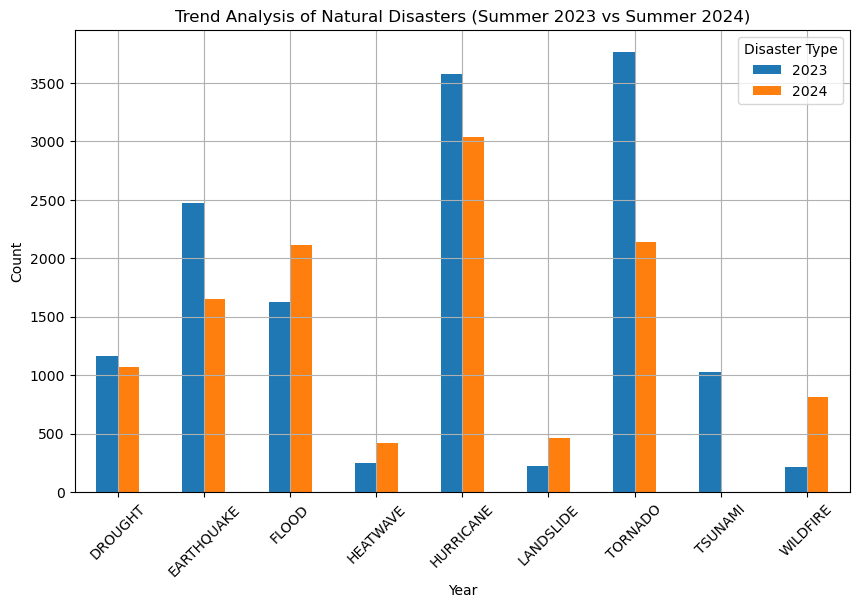

In [33]:
# Copy the dataframes
summer_2023_df = summer_2023_fset.sdf
summer_2024_df = summer_2024_fset.sdf

# Add a year and month column
summer_2023_df['year'] = pd.to_datetime(summer_2023_df['from']).dt.to_period('Y').astype(str)
summer_2024_df['year'] = pd.to_datetime(summer_2024_df['from']).dt.to_period('Y').astype(str)

# Combine the dataframes
combined_df = pd.concat([summer_2023_df, summer_2024_df])

# Group by theme and year, then sum the counts
grouped_df = combined_df.groupby(['theme', 'year'])['count'].sum().reset_index()

# Pivot the dataframe for easier plotting
pivot_df = grouped_df.pivot(index='theme', columns='year', values='count').fillna(0)

# Plot the data
pivot_df.plot(kind='bar', figsize=(10, 6))

plt.title('Trend Analysis of Natural Disasters (Summer 2023 vs Summer 2024)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Disaster Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()